In [1]:
# Work on insurance.csv file

In [2]:
# Classification Algorithm:
# 1. Logistic Regression (Binary Classifier)
# Logistic Regression work on concept of sigmoid funciton or logit fucntion

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [4]:
# To load dataset
df=pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
# Here target means output variable: insuranceclaim (1/0 i.e. True or False)
df["insuranceclaim"].unique()

array([1, 0], dtype=int64)

In [6]:
# How many samplesf of 1's and 0's category
df["insuranceclaim"].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

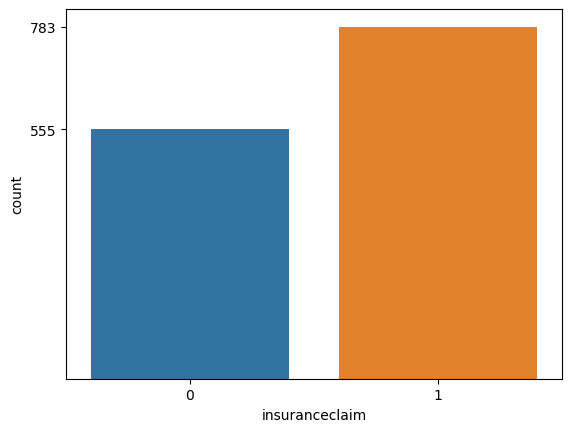

In [7]:
# Visualise
sns.countplot(data=df, x='insuranceclaim')
f=df["insuranceclaim"].value_counts()
plt.yticks(f)
plt.show()

In [8]:
# How many rows and columns in given dataset
df.shape

(1338, 8)

In [9]:
# Checking the null values in the dataset
df.isnull().sum()

age               0
sex               0
bmi               0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [10]:
# To check the datatypes
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

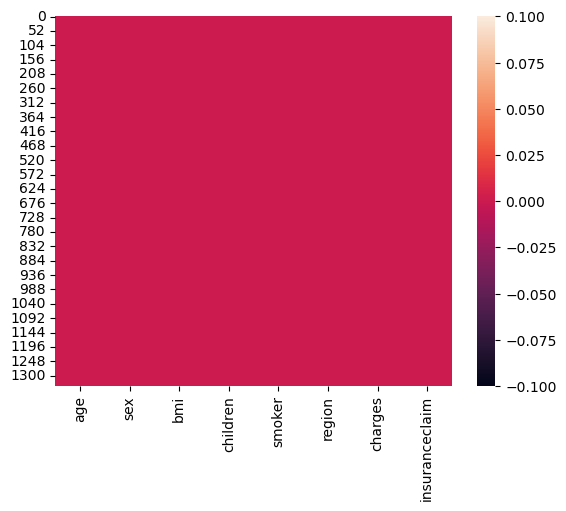

In [11]:
# Visualising the null values
sns.heatmap(df.isnull())
plt.show()

In [12]:
# To check duplicates rows
df.duplicated().sum()

1

In [13]:
# To show deplicates rows
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
581,19,1,30.59,0,0,1,1639.5631,1


In [14]:
# To remove duplicate rows: drop_duplicates()
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum() # No duplicate values in the dataset

0

In [16]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [17]:
df["sex"].value_counts()

1    675
0    662
Name: sex, dtype: int64

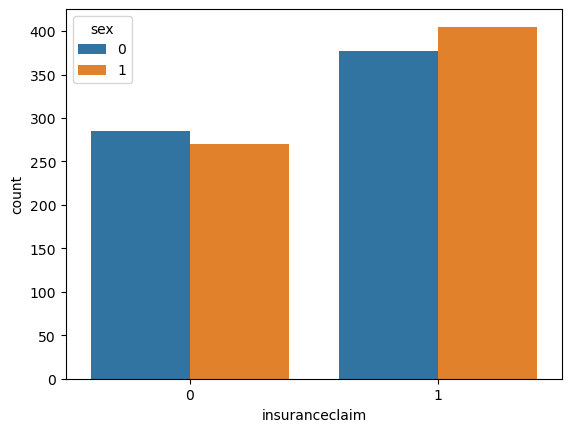

In [18]:
# To check the input sex is important to predict the output insuranceclaim
sns.countplot(data=df, x="insuranceclaim", hue="sex")
# here x= output variable and hue= input variable (categorical type)
plt.show()

Clearly shows that this graph that gender input is not important to predict the output insuranceclaim

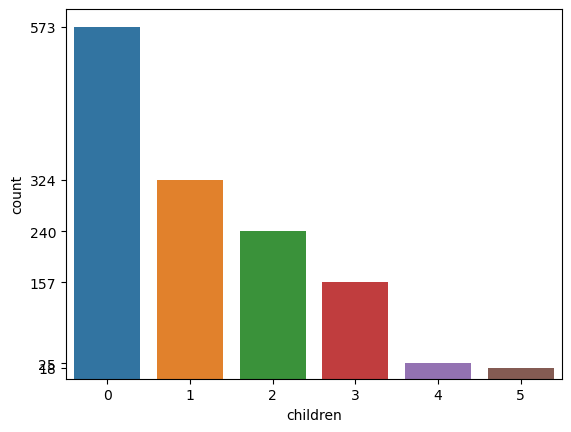

In [19]:
sns.countplot(data=df, x="children")
f=df["children"].value_counts()
plt.yticks(f)
plt.show()

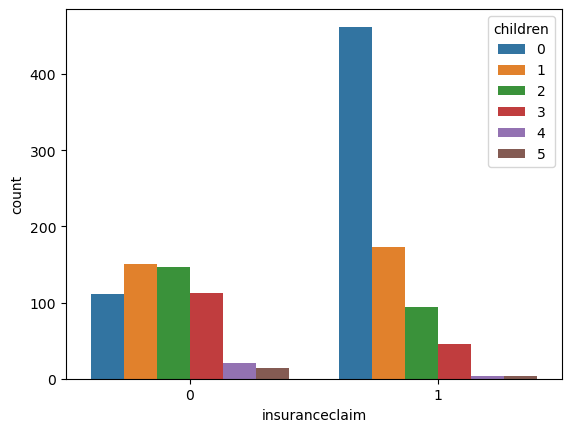

In [20]:
# To check the input children is important to predict the output insuranceclaim
sns.countplot(data=df, x="insuranceclaim", hue="children")
# here x= output variable and hue= input variable (categorical type)
plt.show()

Clearly shows that this graph that children input is important to predict the output insuranceclaim

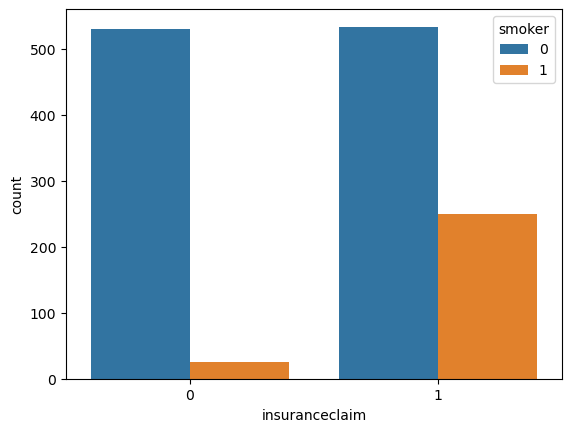

In [21]:
# To check the input smoker is important to predict the output insuranceclaim
sns.countplot(data=df, x="insuranceclaim", hue="smoker")
# here x= output variable and hue= input variable (categorical type)
plt.show()

Clearly shows that this graph that gender input is important to predict the output insuranceclaim

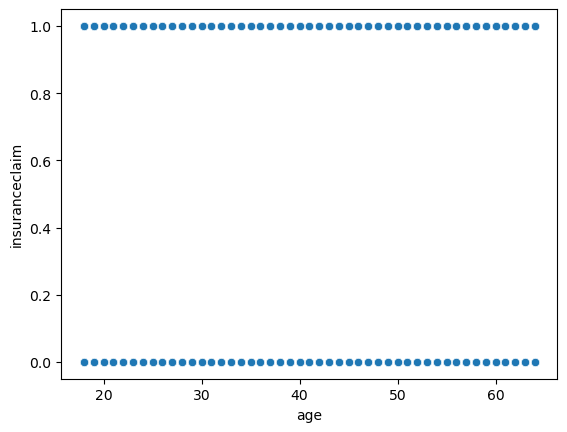

In [22]:
# To check the input age is important to predict the output insuranceclaim
# age input is continuous numeric: scatterplot()
sns.scatterplot(data=df, x="age", y="insuranceclaim")
# here x= output variable and hue= input variable (categorical type)
plt.show()

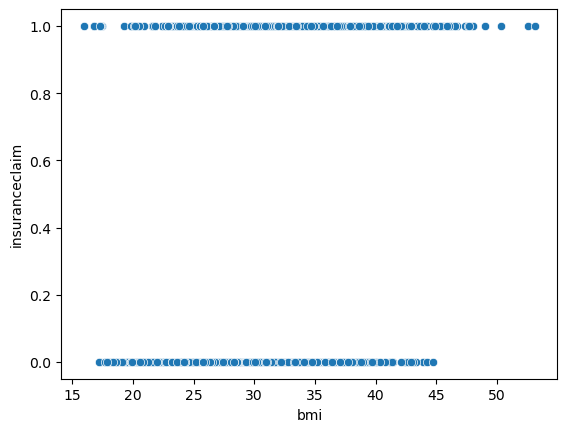

In [23]:
# To check the input bmi is important to predict the output insuranceclaim
# bmi input is continuous numeric: scatterplot()
sns.scatterplot(data=df, x="bmi", y="insuranceclaim")
# here x= output variable and hue= input variable (categorical type)
plt.show()

In [24]:
# Select input and output from given dataset

X=df.drop("insuranceclaim", axis=1)  # input variable
Y=df["insuranceclaim"]  # output

In [25]:
X.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [26]:
Y.head()

0    1
1    1
2    0
3    0
4    1
Name: insuranceclaim, dtype: int64

In [27]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size=0.3, random_state=1)

In [28]:
X_train.shape, X_test.shape

((935, 7), (402, 7))

In [29]:
X_train.head() # all records are random because of random_state=1

,age,sex,bmi,children,smoker,region,charges
520,50,0,27.360,0,0,0,25656.57526
575,58,0,27.170,0,0,1,12222.89830
770,61,1,36.100,3,0,3,27941.28758
314,27,0,31.400,0,1,3,34838.87300
426,38,0,27.265,1,0,0,6555.07035


In [30]:
# Apply scaling: StandardScaler
from sklearn.preprocessing import MinMaxScaler
# Create object of StandardScaler class
ss=MinMaxScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [31]:
X_train

array([[0.69565217, 0.        , 0.30669895, ..., 0.        , 0.        ,
        0.39162438],
       [0.86956522, 0.        , 0.3015873 , ..., 0.        , 0.33333333,
        0.17719522],
       [0.93478261, 1.        , 0.54183481, ..., 0.        , 1.        ,
        0.4280931 ],
       ...,
       [0.08695652, 1.        , 0.47914985, ..., 0.        , 0.66666667,
        0.00882316],
       [0.47826087, 0.        , 0.16841539, ..., 1.        , 0.66666667,
        0.29246312],
       [0.89130435, 1.        , 0.67742803, ..., 1.        , 0.66666667,
        0.76375863]])

In [32]:
# Model create with the help of Logistic Regression
from sklearn.linear_model import LogisticRegression

In [33]:
# Create the object if LogistticRegression class
lr=LogisticRegression()

In [34]:
# Train the model with 70% data, fit() inbuild method for LogisticRegression class

lr.fit(X_train, Y_train)

LogisticRegression()

In [35]:
X_train

array([[0.69565217, 0.        , 0.30669895, ..., 0.        , 0.        ,
        0.39162438],
       [0.86956522, 0.        , 0.3015873 , ..., 0.        , 0.33333333,
        0.17719522],
       [0.93478261, 1.        , 0.54183481, ..., 0.        , 1.        ,
        0.4280931 ],
       ...,
       [0.08695652, 1.        , 0.47914985, ..., 0.        , 0.66666667,
        0.00882316],
       [0.47826087, 0.        , 0.16841539, ..., 1.        , 0.66666667,
        0.29246312],
       [0.89130435, 1.        , 0.67742803, ..., 1.        , 0.66666667,
        0.76375863]])

In [36]:
X_test

array([[0.56521739, 0.        , 0.61850955, ..., 1.        , 0.33333333,
        0.66819714],
       [0.84782609, 1.        , 0.41915523, ..., 0.        , 0.33333333,
        0.16331348],
       [0.80434783, 0.        , 0.44215765, ..., 0.        , 0.        ,
        0.17170756],
       ...,
       [0.76086957, 1.        , 0.14635459, ..., 0.        , 1.        ,
        0.14275731],
       [0.06521739, 0.        , 0.28087167, ..., 0.        , 1.        ,
        0.02355849],
       [0.15217391, 1.        , 0.27602906, ..., 0.        , 0.        ,
        0.02553047]])

In [37]:
# Test the model with 30% data: sigmoid function(Logit function) Y_pred=1/(1+np.exp(-X))
# This equaltion gives the probability value
Y_pred=lr.predict(X_test)
Y_pred    # np.where(Y_pred>=0.5, 1, 0)

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [38]:
X_test.round(2)

array([[0.57, 0.  , 0.62, ..., 1.  , 0.33, 0.67],
       [0.85, 1.  , 0.42, ..., 0.  , 0.33, 0.16],
       [0.8 , 0.  , 0.44, ..., 0.  , 0.  , 0.17],
       ...,
       [0.76, 1.  , 0.15, ..., 0.  , 1.  , 0.14],
       [0.07, 0.  , 0.28, ..., 0.  , 1.  , 0.02],
       [0.15, 1.  , 0.28, ..., 0.  , 0.  , 0.03]])

In [39]:
# Create a dictionary
dict={"Actual Output": Y_test, "Predicted Output": Y_pred}
# Converts into DataFrame
df1=pd.DataFrame(dict)
df1.head(20)

,Actual Output,Predicted Output
629,1,1
1087,1,1
283,1,1
790,1,1
594,1,1
579,0,0
478,1,1
255,1,0
350,0,1
262,1,1


Find the score:- 
There are four types of scores in classification algorithm
1) Recoil score      2) Precision score        3) F1 score      4) Accuracy

In [40]:
# Find the score means accuracy score of medel
# score() inbuilt method of LogisticRegression class
# it is also knows as Accuracy score of model
# Formula= [(TP+FN)/(TP+FP+FN+TN)]
lr.score(X_test, Y_test)

0.8880597014925373

In [41]:
# print report:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.87       172
           1       0.89      0.92      0.90       230

    accuracy                           0.89       402
   macro avg       0.89      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402



In [42]:
# Generate confusion matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test, Y_pred))

[[145  27]
 [ 18 212]]


Score is very good .
Accuracy score is always good. Most of the time, it is very good . 
means we should not depend only accuracy score  .
we also check recall ,precision ,f1-score

Limitation of Logistic Regression:
Feartures do not automatic selected with the help of Logistic Regression.
So use next classification Algorithm: Decision Classifier

In [43]:
#feature selection means select important input with the help of chi2 test 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [51]:
#Create object of SelectKBest class
chi=SelectKBest(score_func=chi2,k=4) #k=4 means select 4 input features 
#select i input features and train the model with chi2
X_train_imp=chi.fit_transform(X_train,Y_train)
#same testing input
X_test_imp=chi.transform(X_test)
print(chi.get_support()) #return answer True/False 
print(X.columns)
#perform the model
#create object of LogisticRegression class
lr=LogisticRegression()
#train the model with 70% data after apply chi2 test
lr.fit(X_train_imp,Y_train)
#test the model
Y_pred=lr.predict(X_test_imp)
print("Classification Report")
print(classification_report(Y_test,Y_pred))
print("Confusion matrix")
print(confusion_matrix(Y_test,Y_pred))

[False False  True  True  True False  True]
Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       172
           1       0.89      0.91      0.90       230

    accuracy                           0.89       402
   macro avg       0.88      0.88      0.88       402
weighted avg       0.89      0.89      0.89       402

Confusion matrix
[[146  26]
 [ 20 210]]


In [45]:
X.shape

(1337, 7)

In [50]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
'''for i in range(1,8):
    #Create object of SelectKBest class
    chi=SelectKBest(score_func=chi2,k=i) #k=1, k=2,.....k=7
    print("No. of inputs : ",i)
    #select i input features and train the model with chi2
    X_train_imp=chi.fit_transform(X_train,Y_train)
    #same testing input
    X_test_imp=chi.transform(X_test)
    #print(chi.get_support()) #return answer True/False 
    #print(X.columns)
    dict={'Input Columns':X.columns,'Support_Anova':chi.get_support()}
    df2=pd.DataFrame(dict)
    print(df2)
    #perform the model
    #create object of LogisticRegression class
    lr=LogisticRegression()
    #train the model with 70% data after apply chi2 test
    lr.fit(X_train_imp,Y_train)
    #test the model
    Y_pred=lr.predict(X_test_imp)
    print("Classification Report")
    print(classification_report(Y_test,Y_pred))
    print("Confusion matrix")
    print(confusion_matrix(Y_test,Y_pred))'''

No. of inputs :  1
  Input Columns  Support_Anova
0           age          False
1           sex          False
2           bmi          False
3      children          False
4        smoker           True
5        region          False
6       charges          False
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       172
           1       0.57      1.00      0.73       230

    accuracy                           0.57       402
   macro avg       0.29      0.50      0.36       402
weighted avg       0.33      0.57      0.42       402

Confusion matrix
[[  0 172]
 [  0 230]]
No. of inputs :  2
  Input Columns  Support_Anova
0           age          False
1           sex          False
2           bmi          False
3      children           True
4        smoker           True
5        region          False
6       charges          False
Classification Report
              precision    recall  f1-score   support



In [ ]:
#X-X.min()/(X.max()-X.min())